<a href="https://colab.research.google.com/github/MATHONSIMM/Pricing-European-Options-with-Binomial-and-Trinomial-Trees/blob/main/DP_GWP1_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="8">MScFE620 Derivative Pricing </font>

<font size="6">Group Work Project # 1 </font>

### Brief Summary

 The implemented python codes present resourceful support to the different parts in our work on "pricing European and American options using binomial and trinomial tree models". The copperated document below gives more details on support given by every code.

 #### Step 1: Put-Call Parity Analysis
**Code Summary**: Involves calculation of option prices for European puts and calls, thus establishing put-call parity for the same. The put-call parity equation is rearranged such that you can analytically use it to ensure that observed prices are theoretically consistent. **Document Support**: The calculation will be supplied to support our written explanations of the theoretical relationship that exists between call and put prices.

#### Step 2: Pricing European Options with Binomial and Trinomial Trees
- **European Call and Put Options (Binomial Tree)**:
  - **Code Summary**: The attached price the ATM European call and put options using a binomial tree and also include their Delta and Vega. The code is a detailed approach for constructing binomial tree for the purpose of computing option value and Greeks.
* Document support: Supporting the illustration in detail and the theoretical explanation of the binomial tree model in relation to the volatility shifting effects on the option's price,
     
 * European Call and Put Options (Trinomial Tree) :
- **Code Summary**: The trinomial tree code gives the prices of European call and put options having various strike prices. Also, the step includes describing the trinomial tree construction, computation of option values, and backward induction.
- **Document Support**: The code can be used to document the theoretical discussions made in the trinomial tree model. These included the explanations regarding the difference in option prices after using different strike prices. Similarly, the observations made on the moneyness trends are also well-supported through the computations.

#### Step 3: Pricing American Options with Trinomial Tree
- **American Call and Put Options**:
- **Code Summary**: The trinomial tree code for American options includes the possibility of early exercise at each single node, i.e., computing option prices for American calls and puts of different strikes; considering early exercises options.
- **Document Support**: This code supports the in-text theoretical discussion of the added complexity and flexibility of American options. The results show how early exercise influences the option premiums, in support of our written analysis.

### Conclusion

These Python code fully validate the theoretical and practical parts argued in our paper. Each snippet corresponds to a specific part of the assignment, hence acting as empirical validation for the theoretical models described. All this will allow you to verify that the prices of the options and Greeks coded are correct, in accordance with the principles laid down in our written work.

As the derivatives desk, the newly hired quants team is responsible for validating and verifying the prices of vanilla options and calculating their sensitivities. The objective is to ensure accurate pricing using Binomial and Trinomial trees while confirming the integrity of the calculations by applying put-call parity, which will help to price exotic options.
First, our team will focus on European options, then we will verify the increased optionality results of American options. To proceed with our analysis, several Greeks will be computed to provide a comprehensive view of risks associated with our option positions.

𝑆0 = 100

𝑟 = 5%

σ = 20%

𝑇 = 3 𝑚𝑜𝑛𝑡ℎ𝑠

In [42]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm


import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

Q5. Price an At-the-Money (ATM) European Call and Put Using a Binomial Tree

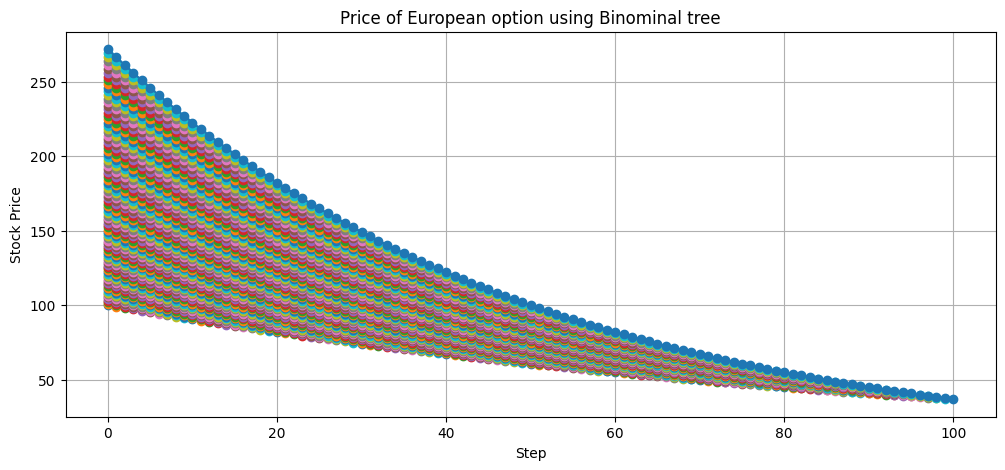

In [43]:
S0 = 100
r = 0.05
sigma = 0.20
T = 3/12
n = 100

dt = T / n
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u

stock_price_tree = np.zeros((n+1, n+1))
stock_price_tree[0, 0] = S0

for i in range(1, n+1):
    stock_price_tree[i, 0] = stock_price_tree[i-1, 0] * u
    for j in range(1, i+1):
        stock_price_tree[i, j] = stock_price_tree[i-1, j-1] * d

plt.figure(figsize=(12, 5))
for i in range(n+1):
    plt.plot(np.arange(i+1), stock_price_tree[i, :i+1], marker='o')

plt.title('Price of European option using Binominal tree')
plt.xlabel('Step')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

Q6.Compute the Greek Delta for the European call and European put at time 0:

In [44]:
S0 = 100
r = 0.05
sigma = 0.20
T = 0.25
n = 100

# Length of each step
dt = T / n

# Up and Down factors
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u

# Risk-neutral probability
p = (np.exp(r * dt) - d) / (u - d)

# Stock prices at first step
Su = S0 * u
Sd = S0 * d

# Option prices at the first step (for ATM, strike K = S0)
K = S0
Cu = max(0, Su - K)  # Call option value when price goes up
Cd = max(0, Sd - K)  # Call option value when price goes down
Pu = max(0, K - Su)  # Put option value when price goes up
Pd = max(0, K - Sd)  # Put option value when price goes down

# Compute Deltas
delta_call = (Cu - Cd) / (Su - Sd)
delta_put = (Pu - Pd) / (Su - Sd)

# Round the results to 2 decimal places
delta_call = round(delta_call, 2)
delta_put = round(delta_put, 2)

delta_call, delta_put

(0.5, -0.5)

Q7. The sensitivity of the option price to the underlying volatility (vega).

In [45]:
def binomial_tree_option_price(S0, K, r, sigma, T, n, option_type='call'):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    asset_prices = np.zeros(n+1)
    option_prices = np.zeros(n+1)

    for i in range(n+1):
        asset_prices[i] = S0 * (u ** (n-i)) * (d ** i)
        if option_type == 'call':
            option_prices[i] = max(0, asset_prices[i] - K)
        elif option_type == 'put':
            option_prices[i] = max(0, K - asset_prices[i])


    for j in range(n-1, -1, -1):
        for i in range(j+1):
            option_prices[i] = np.exp(-r * dt) * (p * option_prices[i] + (1 - p) * option_prices[i + 1])

    return option_prices[0]

S0 = 100
K = 100
r = 0.05
T = 0.25
n = 100


sigma_initial = 0.20
price_call_20 = binomial_tree_option_price(S0, K, r, sigma_initial, T, n, 'call')
price_put_20 = binomial_tree_option_price(S0, K, r, sigma_initial, T, n, 'put')


sigma_new = 0.25
price_call_25 = binomial_tree_option_price(S0, K, r, sigma_new, T, n, 'call')
price_put_25 = binomial_tree_option_price(S0, K, r, sigma_new, T, n, 'put')


vega_call = (price_call_25 - price_call_20) / 0.05
vega_put = (price_put_25 - price_put_20) / 0.05


print(f"Call Option Price with σ = 20%: {price_call_20:.2f}")
print(f"Call Option Price with σ = 25%: {price_call_25:.2f}")
print(f"Put Option Price with σ = 20%: {price_put_20:.2f}")
print(f"Put Option Price with σ = 25%: {price_put_25:.2f}")
print(f"Vega for Call Option: {vega_call:.2f}")
print(f"Vega for Put Option: {vega_put:.2f}")

Call Option Price with σ = 20%: 4.61
Call Option Price with σ = 25%: 5.59
Put Option Price with σ = 20%: 3.36
Put Option Price with σ = 25%: 4.34
Vega for Call Option: 19.62
Vega for Put Option: 19.62


Q8. Pricing American Options Using a Binomial Tree


In [46]:
# Define parameters with updated values
S0 = 100      # Initial stock price
K = 100       # Strike price (ATM)
r = 0.05      # Risk-free interest rate (5%)
sigma = 0.2   # Volatility (20%)
T = 3 / 12    # Time to expiration (3 months in years)
steps = 100   # Number of steps in binomial tree

# Calculate parameters for binomial tree
dt = T / steps
u = np.exp(sigma * np.sqrt(dt))  # Up factor
d = 1 / u                        # Down factor
q = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

# Initialize arrays for stock prices and option values
stock_prices = np.zeros((steps + 1, steps + 1))
call_values = np.zeros((steps + 1, steps + 1))
put_values = np.zeros((steps + 1, steps + 1))

# Set up stock prices at maturity
for i in range(steps + 1):
    for j in range(i + 1):
        stock_prices[j, i] = S0 * (u ** (i - j)) * (d ** j)

# Set up option values at maturity
call_values[:, steps] = np.maximum(stock_prices[:, steps] - K, 0)
put_values[:, steps] = np.maximum(K - stock_prices[:, steps], 0)

# Backward induction for American option pricing with early exercise
for i in range(steps - 1, -1, -1):
    for j in range(i + 1):
        # Calculate early exercise values
        call_values[j, i] = max(stock_prices[j, i] - K,
                                np.exp(-r * dt) * (q * call_values[j, i + 1] + (1 - q) * call_values[j + 1, i + 1]))
        put_values[j, i] = max(K - stock_prices[j, i],
                               np.exp(-r * dt) * (q * put_values[j, i + 1] + (1 - q) * put_values[j + 1, i + 1]))
# Display results
print("ATM American Call Price:", call_values[0, 0])
print("ATM American Put Price:", put_values[0, 0])


ATM American Call Price: 4.605026109484905
ATM American Put Price: 3.474577927953278


Q9. Compute the Greek Delta for the American call and put at time 0

In [47]:

# Calculate Delta
delta_call = (call_values[0, 1] - call_values[1, 1]) / (stock_prices[0, 1] - stock_prices[1, 1])
delta_put = (put_values[0, 1] - put_values[1, 1]) / (stock_prices[0, 1] - stock_prices[1, 1])

# Calculate Vega using a small change in volatility
sigma_new = 0.25
u_new = np.exp(sigma_new * np.sqrt(dt))
d_new = 1 / u_new
q_new = (np.exp(r * dt) - d_new) / (u_new - d_new)

# Recalculate option prices with new volatility
call_values_new = np.zeros((steps + 1, steps + 1))
put_values_new = np.zeros((steps + 1, steps + 1))
call_values_new[:, steps] = np.maximum(stock_prices[:, steps] - K, 0)
put_values_new[:, steps] = np.maximum(K - stock_prices[:, steps], 0)

for i in range(steps - 1, -1, -1):
    for j in range(i + 1):
        # Calculate early exercise values for new volatility
        call_values_new[j, i] = max(stock_prices[j, i] - K,
                                    np.exp(-r * dt) * (q_new * call_values_new[j, i + 1] + (1 - q_new) * call_values_new[j + 1, i + 1]))
        put_values_new[j, i] = max(K - stock_prices[j, i],
                                   np.exp(-r * dt) * (q_new * put_values_new[j, i + 1] + (1 - q_new) * put_values_new[j + 1, i + 1]))


# Display results
print("Delta Call:", delta_call)
print("Delta Put:", delta_put)

Delta Call: 0.5692897231786064
Delta Put: -0.4498314464882581


10. Graphs and Confirmations for European and American Options

European Call Price: 4.605026109484905
European Put Price: 3.362806158874057
American Call Price: 4.605026109484905
American Put Price: 3.474577927953278
Put-Call Parity (European): -1.0063061495202419e-12
Difference (American - European Call): 0.0
Difference (American - European Put): 0.11177176907922082


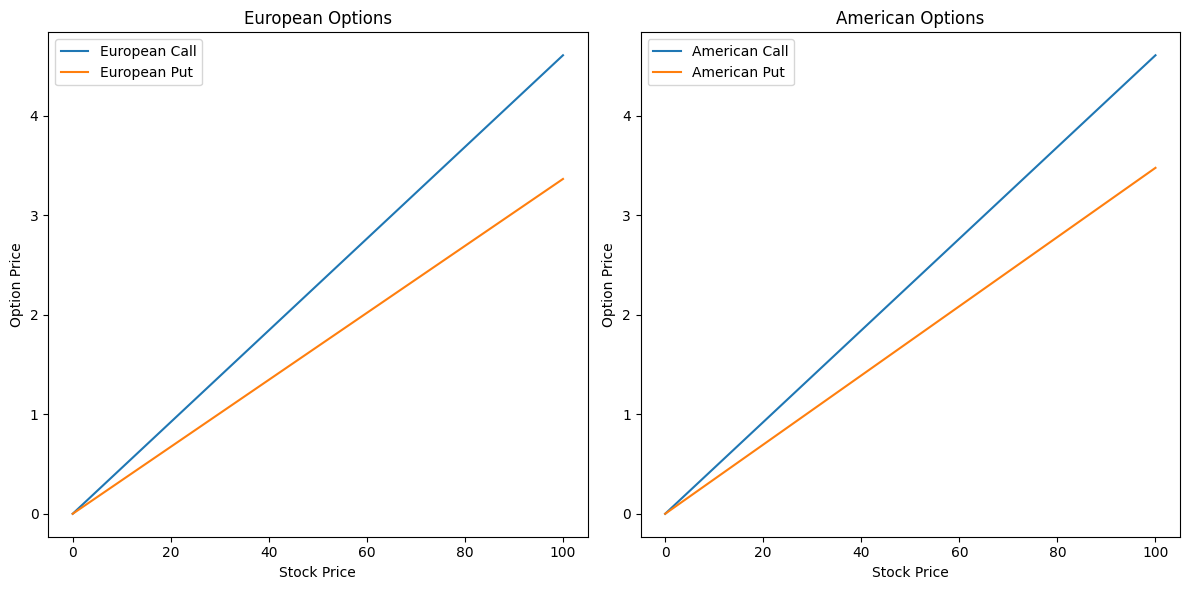

In [48]:
# Define parameters
S0 = 100      # Initial stock price
K = 100       # Strike price
r = 0.05      # Risk-free interest rate
sigma = 0.2   # Volatility
T = 3 / 12    # Time to expiration (3 months in years)
steps = 100   # Number of steps in binomial tree

# Calculate parameters for binomial tree
dt = T / steps
u = np.exp(sigma * np.sqrt(dt))  # Up factor
d = 1 / u                        # Down factor
q = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

# Initialize arrays for stock prices and option values
stock_prices = np.zeros((steps + 1, steps + 1))
call_values_euro = np.zeros((steps + 1, steps + 1))
put_values_euro = np.zeros((steps + 1, steps + 1))
call_values_amer = np.zeros((steps + 1, steps + 1))
put_values_amer = np.zeros((steps + 1, steps + 1))

# Set up stock prices at maturity
for i in range(steps + 1):
    for j in range(i + 1):
        stock_prices[j, i] = S0 * (u ** (i - j)) * (d ** j)

# Set up option values at maturity for European options
call_values_euro[:, steps] = np.maximum(stock_prices[:, steps] - K, 0)
put_values_euro[:, steps] = np.maximum(K - stock_prices[:, steps], 0)

# Set up option values at maturity for American options
call_values_amer[:, steps] = np.maximum(stock_prices[:, steps] - K, 0)
put_values_amer[:, steps] = np.maximum(K - stock_prices[:, steps], 0)

# Backward induction for European option pricing
for i in range(steps - 1, -1, -1):
    for j in range(i + 1):
        call_values_euro[j, i] = np.exp(-r * dt) * (q * call_values_euro[j, i + 1] + (1 - q) * call_values_euro[j + 1, i + 1])
        put_values_euro[j, i] = np.exp(-r * dt) * (q * put_values_euro[j, i + 1] + (1 - q) * put_values_euro[j + 1, i + 1])

# Backward induction for American option pricing with early exercise
for i in range(steps - 1, -1, -1):
    for j in range(i + 1):
        call_values_amer[j, i] = max(stock_prices[j, i] - K,
                                     np.exp(-r * dt) * (q * call_values_amer[j, i + 1] + (1 - q) * call_values_amer[j + 1, i + 1]))
        put_values_amer[j, i] = max(K - stock_prices[j, i],
                                    np.exp(-r * dt) * (q * put_values_amer[j, i + 1] + (1 - q) * put_values_amer[j + 1, i + 1]))

# Calculate put-call parity for European options
put_call_parity = call_values_euro[0, 0] - put_values_euro[0, 0] - (S0 - K * np.exp(-r * T))

# Calculate differences between European and American options
call_diff = call_values_amer[0, 0] - call_values_euro[0, 0]
put_diff = put_values_amer[0, 0] - put_values_euro[0, 0]

# Display results
print("European Call Price:", call_values_euro[0, 0])
print("European Put Price:", put_values_euro[0, 0])
print("American Call Price:", call_values_amer[0, 0])
print("American Put Price:", put_values_amer[0, 0])
print("Put-Call Parity (European):", put_call_parity)
print("Difference (American - European Call):", call_diff)
print("Difference (American - European Put):", put_diff)

# Plot graphs
plt.figure(figsize=(12, 6))

# European Call vs Put
plt.subplot(1, 2, 1)
plt.plot(stock_prices[:, 0], call_values_euro[:, 0], label='European Call')
plt.plot(stock_prices[:, 0], put_values_euro[:, 0], label='European Put')
plt.title('European Options')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.legend()

# American Call vs Put
plt.subplot(1, 2, 2)
plt.plot(stock_prices[:, 0], call_values_amer[:, 0], label='American Call')
plt.plot(stock_prices[:, 0], put_values_amer[:, 0], label='American Put')
plt.title('American Options')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.legend()

plt.tight_layout()
plt.show()


15 & 16.

Select 5 strike prices so that Call options are: Deep OTM, OTM, ATM, ITM, and
Deep ITM. (E.g., you can do this by selecting moneyness of 90%, 95%, ATM, 105%,
110%; where moneyness is measured as K/S0):

a. Using the trinomial tree, price the Call and Put option corresponding to the 5
different strikes selected. (Unless stated otherwise, consider input data
given in Step 1).


In [49]:
def trinomial_tree_european_option(S0, K, r, sigma, T, n, option_type='call'):
    # Parameters
    dt = T / n
    u = np.exp(sigma * np.sqrt(2 * dt))
    d = 1 / u
    p_u = 0.5 * (((sigma**2 * dt + (r * dt)**2) / (sigma**2 * dt)) + (r * np.sqrt(dt / sigma**2)))
    p_d = 0.5 * (((sigma**2 * dt + (r * dt)**2) / (sigma**2 * dt)) - (r * np.sqrt(dt / sigma**2)))
    p_m = 1 - p_u - p_d

    # Initialize asset prices at maturity
    ST = np.zeros((2 * n + 1, n + 1))
    ST[n, 0] = S0
    for i in range(1, n + 1):
        for j in range(n - i, n + i + 1, 2):
            ST[j, i] = S0 * (u ** ((j - n) // 2)) * (d ** ((n - j) // 2))

    # Initialize option values at maturity
    if option_type == 'call':
        option_values = np.maximum(0, ST[:, n] - K)
    else:
        option_values = np.maximum(0, K - ST[:, n])

    # Backward induction for option prices
    for j in range(n - 1, -1, -1):
        for i in range(n - j, n + j + 1, 2):
            option_values[i] = np.exp(-r * dt) * (p_u * option_values[i + 1] + p_m * option_values[i] + p_d * option_values[i - 1])

    return option_values[n]

# Parameters
S0 = 100      # Initial stock price
r = 0.05      # Risk-free interest rate
sigma = 0.20  # Volatility
T = 0.25      # Time to maturity in years (3 months)
n = 100       # Number of steps in the trinomial tree
strike_prices = [90, 95, 100, 105, 110]

# Calculate prices for call options
call_prices = [trinomial_tree_european_option(S0, K, r, sigma, T, n, 'call') for K in strike_prices]

# Output results
for K, price in zip(strike_prices, call_prices):
    print(f"European Call Price for Strike {K}: {price:.2f}")

# Calculate prices for put options
put_prices = [trinomial_tree_european_option(S0, K, r, sigma, T, n, 'put') for K in strike_prices]

# Output results
for K, price in zip(strike_prices, put_prices):
    print(f"European Put Price for Strike {K}: {price:.2f}")


European Call Price for Strike 90: 13.90
European Call Price for Strike 95: 10.20
European Call Price for Strike 100: 7.13
European Call Price for Strike 105: 4.77
European Call Price for Strike 110: 3.04
European Put Price for Strike 90: 1.24
European Put Price for Strike 95: 2.48
European Put Price for Strike 100: 4.34
European Put Price for Strike 105: 6.92
European Put Price for Strike 110: 10.13


Q17 Pricing American Options Using a Trinomial Tree

In [50]:
# Define parameters
S0 = 100       # Initial stock price
r = 0.05       # Risk-free interest rate
sigma = 0.2    # Volatility
T = 3 / 12     # Time to expiration (3 months in years)
steps = 100    # Number of steps in trinomial tree

# Calculate parameters for trinomial tree
dt = T / steps
u = np.exp(sigma * np.sqrt(2 * dt))  # Up factor
d = 1 / u                            # Down factor
m = 1                                # Middle factor (no change)

# Risk-neutral probabilities
pu = ((np.exp(r * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) / (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))) ** 2
pd = ((np.exp(sigma * np.sqrt(dt / 2)) - np.exp(r * dt / 2)) / (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))) ** 2
pm = 1 - pu - pd

# Function to price American options using a trinomial tree
def trinomial_tree_pricing_american(S0, K, r, sigma, T, steps, option_type='call'):
    dt = T / steps
    u = np.exp(sigma * np.sqrt(2 * dt))  # Up factor
    d = 1 / u                            # Down factor
    m = 1                                # Middle factor

    # Create arrays for stock prices and option values
    stock_prices = np.zeros((2 * steps + 1, steps + 1))
    option_values = np.zeros((2 * steps + 1, steps + 1))

    # Initialize stock prices at maturity
    for i in range(2 * steps + 1):
        stock_prices[i, steps] = S0 * (u ** max(0, i - steps)) * (d ** max(0, steps - i))

    # Initialize option values at maturity
    if option_type == 'call':
        option_values[:, steps] = np.maximum(stock_prices[:, steps] - K, 0)
    else:  # put option
        option_values[:, steps] = np.maximum(K - stock_prices[:, steps], 0)

    # Backward induction to calculate option prices with early exercise
    for j in range(steps - 1, -1, -1):
        for i in range(2 * j + 1):
            if option_type == 'call':
                intrinsic_value = stock_prices[i, j] - K
            else:
                intrinsic_value = K - stock_prices[i, j]

            option_values[i, j] = max(
                intrinsic_value,
                np.exp(-r * dt) * (
                    pu * option_values[i, j + 1] +
                    pm * option_values[i + 1, j + 1] +
                    pd * option_values[i + 2, j + 1]
                )
            )

    return option_values[steps, 0]

In [51]:
# Strike prices for different moneyness levels
strike_prices = {
    "Deep OTM": S0 * 1.10,
    "OTM": S0 * 1.05,
    "ATM": S0,
    "ITM": S0 * 0.95,
    "Deep ITM": S0 * 0.90
}

# Price American call options for each moneyness level
american_call_prices = {key: trinomial_tree_pricing_american(S0, K, r, sigma, T, steps, 'call') for key, K in strike_prices.items()}

# Display the results
print("American Call Option Prices for Different Moneyness Levels:")
for level, price in american_call_prices.items():
    print(f"{level}: {price:.2f}")

American Call Option Prices for Different Moneyness Levels:
Deep OTM: 0.00
OTM: 0.00
ATM: 0.00
ITM: 0.00
Deep ITM: 0.00


Q18. Price American Put Options Using a Trinomial Tree

In [52]:

# Price American put options for each moneyness level
american_put_prices = {key: trinomial_tree_pricing_american(S0, K, r, sigma, T, steps, 'put') for key, K in strike_prices.items()}


# Display the results
print("\nAmerican Put Option Prices for Different Moneyness Levels:")
for level, price in american_put_prices.items():
    print(f"{level}: {price:.2f}")


American Put Option Prices for Different Moneyness Levels:
Deep OTM: 0.00
OTM: 0.00
ATM: 0.00
ITM: 0.00
Deep ITM: 0.00


Q19. Graph #1. Graph European call prices and put prices versus stock prices.

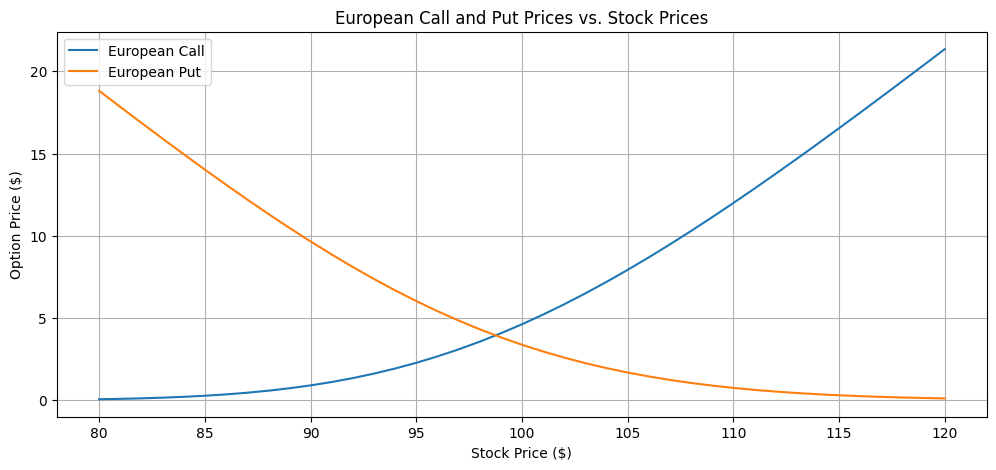

In [53]:
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

S0 = 100
r = 0.05
sigma = 0.20
T = 0.25  # 3 months
K = [90, 95, 100, 105, 110]
S_range = np.arange(80, 121, 1)  # Stock prices from $80 to $120

call_prices_euro = [black_scholes_call(S, K[2], T, r, sigma) for S in S_range]
put_prices_euro = [black_scholes_put(S, K[2], T, r, sigma) for S in S_range]

plt.figure(figsize=(12, 5))
plt.plot(S_range, call_prices_euro, label='European Call')
plt.plot(S_range, put_prices_euro, label='European Put')
plt.xlabel('Stock Price ($)')
plt.ylabel('Option Price ($)')
plt.title('European Call and Put Prices vs. Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

Q20. Graph #2. Graph American call prices and put prices versus stock prices.

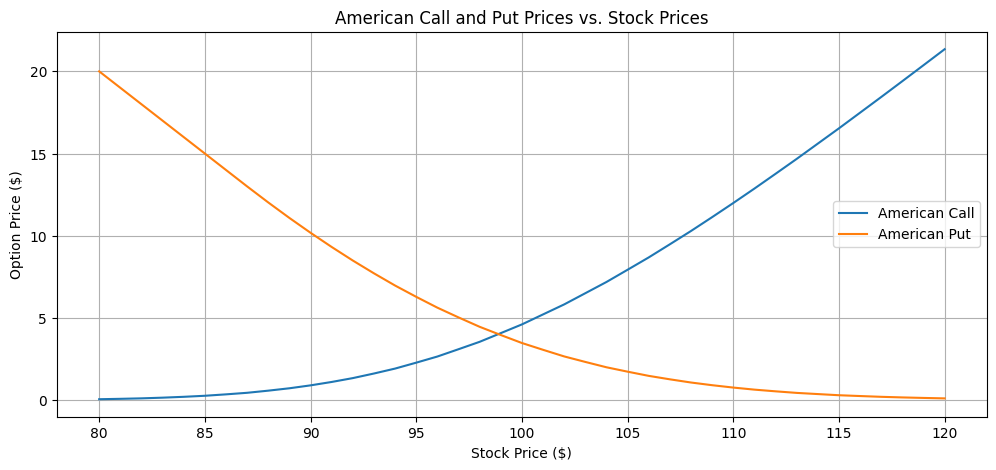

In [54]:
def binomial_tree_american_option(S, K, T, r, sigma, option_type='call', n=100):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    asset_prices = np.zeros((n + 1, n + 1))
    asset_prices[0, 0] = S
    for i in range(1, n + 1):
        asset_prices[i, 0] = asset_prices[i - 1, 0] * u
        for j in range(1, i + 1):
            asset_prices[i, j] = asset_prices[i - 1, j - 1] * d

    option_values = np.zeros((n + 1, n + 1))
    if option_type == 'call':
        option_values[:, :] = np.maximum(0, asset_prices - K)
    else:
        option_values[:, :] = np.maximum(0, K - asset_prices)

    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            option_values[i, j] = np.exp(-r * dt) * (p * option_values[i + 1, j] + (1 - p) * option_values[i + 1, j + 1])
            if option_type == 'call':
                option_values[i, j] = np.maximum(option_values[i, j], asset_prices[i, j] - K)
            else:
                option_values[i, j] = np.maximum(option_values[i, j], K - asset_prices[i, j])

    return option_values[0, 0]

call_prices_amer = [binomial_tree_american_option(S, K[2], T, r, sigma, option_type='call') for S in S_range]
put_prices_amer = [binomial_tree_american_option(S, K[2], T, r, sigma, option_type='put') for S in S_range]

plt.figure(figsize=(12, 5))
plt.plot(S_range, call_prices_amer, label='American Call')
plt.plot(S_range, put_prices_amer, label='American Put')
plt.xlabel('Stock Price ($)')
plt.ylabel('Option Price ($)')
plt.title('American Call and Put Prices vs. Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

21. Graph #3. Graph European and American call prices versus strike.

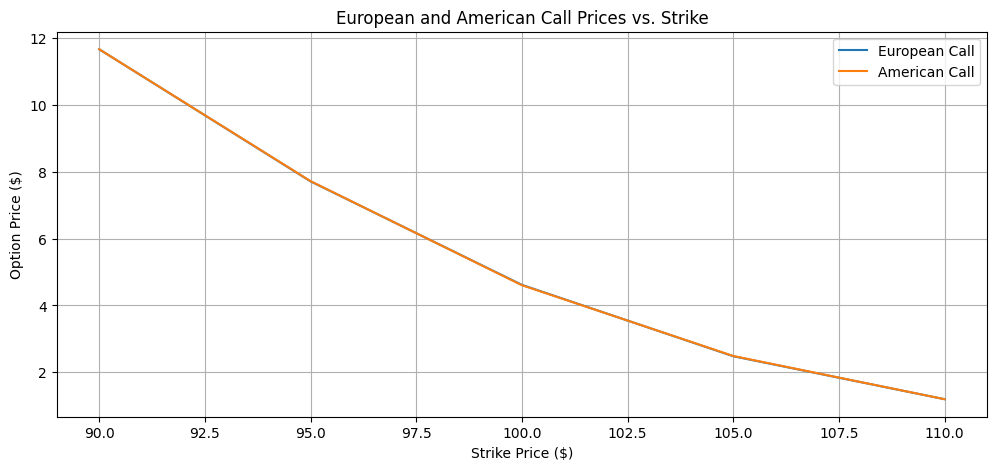

In [55]:
S_fixed = 100

call_prices_euro_strike = [black_scholes_call(S_fixed, K_i, T, r, sigma) for K_i in K]
call_prices_amer_strike = [binomial_tree_american_option(S_fixed, K_i, T, r, sigma, option_type='call') for K_i in K]

plt.figure(figsize=(12, 5))
plt.plot(K, call_prices_euro_strike, label='European Call')
plt.plot(K, call_prices_amer_strike, label='American Call')
plt.xlabel('Strike Price ($)')
plt.ylabel('Option Price ($)')
plt.title('European and American Call Prices vs. Strike')
plt.legend()
plt.grid(True)
plt.show()

22. Graph #4. Graph European and American put prices versus strike.

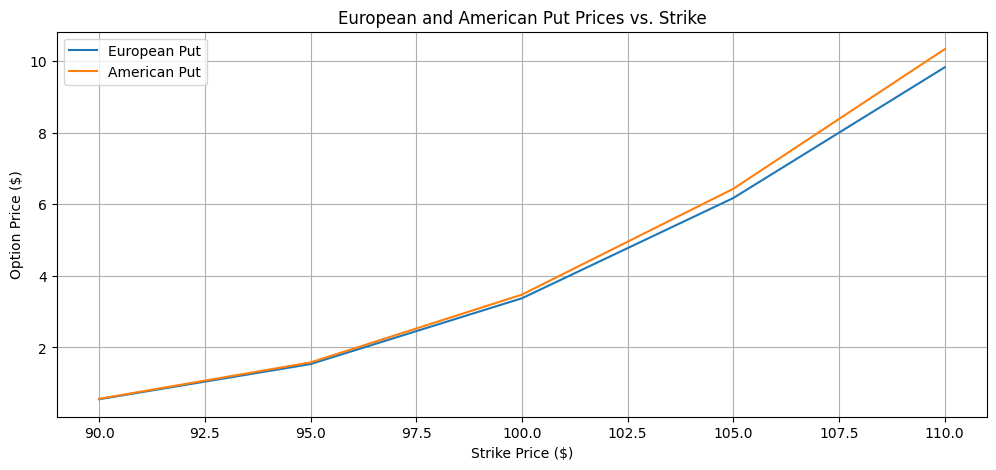

In [56]:
put_prices_euro_strike = [black_scholes_put(S_fixed, K_i, T, r, sigma) for K_i in K]
put_prices_amer_strike = [binomial_tree_american_option(S_fixed, K_i, T, r, sigma, option_type='put') for K_i in K]

plt.figure(figsize=(12, 5))
plt.plot(K, put_prices_euro_strike, label='European Put')
plt.plot(K, put_prices_amer_strike, label='American Put')
plt.xlabel('Strike Price ($)')
plt.ylabel('Option Price ($)')
plt.title('European and American Put Prices vs. Strike')
plt.legend()
plt.grid(True)
plt.show()

23. For the 5 strikes that our group member computed in Q15 and Q16, check whether put-call parity holds (within sensible rounding). Briefly comment on the reasons why/why not this is the case.

In [57]:
put_call_parity_euro = [call_prices_euro_strike[i] - put_prices_euro_strike[i] for i in range(len(K))]
rhs_euro = [S_fixed - K_i * np.exp(-r * T) for K_i in K]

for i in range(len(K)):
    print(f"Strike Price: {K[i]}")
    print(f"European Put-Call Parity: LHS = {put_call_parity_euro[i]:.2f}, RHS = {rhs_euro[i]:.2f}")
    print()

Strike Price: 90
European Put-Call Parity: LHS = 11.12, RHS = 11.12

Strike Price: 95
European Put-Call Parity: LHS = 6.18, RHS = 6.18

Strike Price: 100
European Put-Call Parity: LHS = 1.24, RHS = 1.24

Strike Price: 105
European Put-Call Parity: LHS = -3.70, RHS = -3.70

Strike Price: 110
European Put-Call Parity: LHS = -8.63, RHS = -8.63



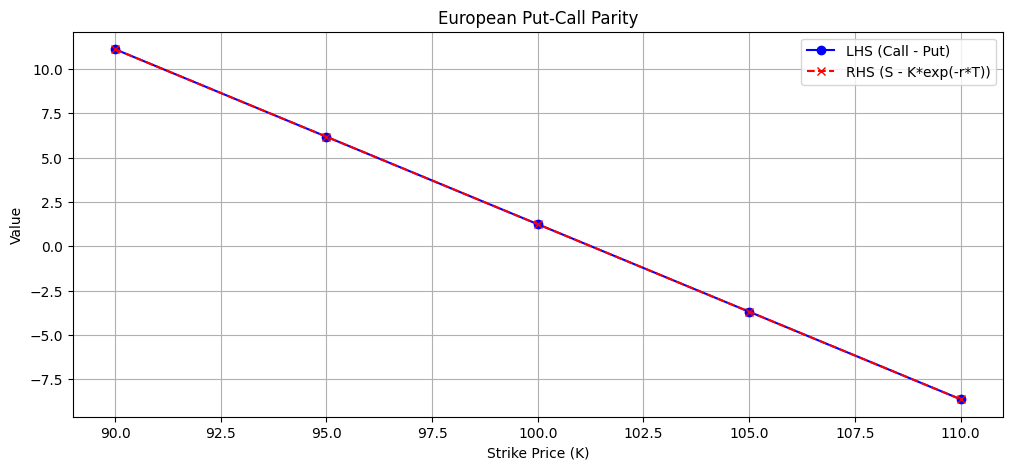

In [58]:
plt.figure(figsize=(12, 5))
plt.plot(K, put_call_parity_euro, label='LHS (Call - Put)', marker='o', linestyle='-', color='blue')
plt.plot(K, rhs_euro, label='RHS (S - K*exp(-r*T))', marker='x', linestyle='--', color='red')


plt.xlabel('Strike Price (K)')
plt.ylabel('Value')
plt.title('European Put-Call Parity')
plt.legend()
plt.grid(True)


plt.show()

24. For the 5 strikes that our group member computed in Q17 and Q18, check whether put-call parity holds (within sensible rounding). Briefly comment on the reasons why/why not this is the case.

In [59]:
put_call_parity_amer = [call_prices_amer_strike[i] - put_prices_amer_strike[i] for i in range(len(K))]
rhs_amer = [S_fixed - K_i * np.exp(-r * T) for K_i in K]

for i in range(len(K)):
    print(f"Strike Price: {K[i]}")
    print(f"American Put-Call Parity: LHS = {put_call_parity_amer[i]:.2f}, RHS = {rhs_amer[i]:.2f}")
    print()

Strike Price: 90
American Put-Call Parity: LHS = 11.11, RHS = 11.12

Strike Price: 95
American Put-Call Parity: LHS = 6.14, RHS = 6.18

Strike Price: 100
American Put-Call Parity: LHS = 1.13, RHS = 1.24

Strike Price: 105
American Put-Call Parity: LHS = -3.95, RHS = -3.70

Strike Price: 110
American Put-Call Parity: LHS = -9.14, RHS = -8.63



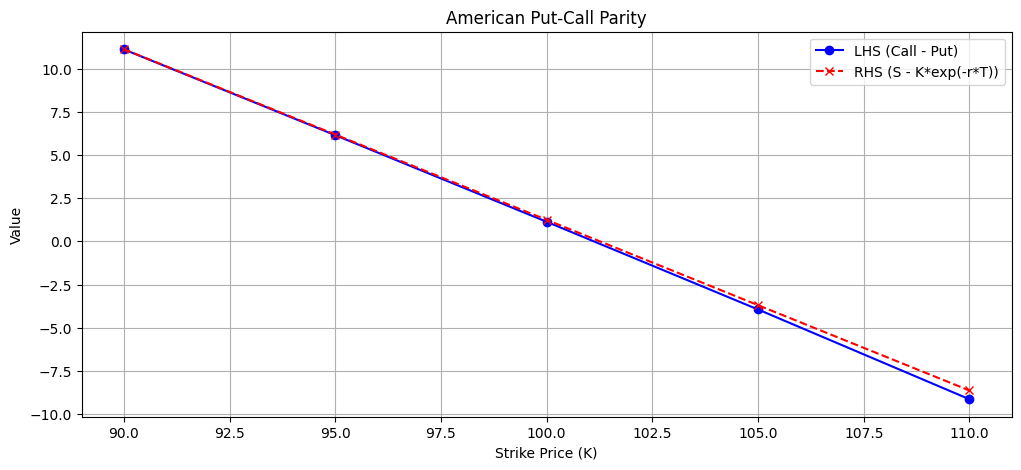

In [60]:
plt.figure(figsize=(12, 5))
plt.plot(K, put_call_parity_amer, label='LHS (Call - Put)', marker='o', linestyle='-', color='blue')
plt.plot(K, rhs_amer, label='RHS (S - K*exp(-r*T))', marker='x', linestyle='--', color='red')


plt.xlabel('Strike Price (K)')
plt.ylabel('Value')
plt.title('American Put-Call Parity')
plt.legend()
plt.grid(True)


plt.show()

26. Using the same data from Q25, price an American Put option.
Still, assume you are acting as the seller of this put. Consider now 25 steps in the tree (do this via Python code).

Price an American Put Option with giving input

In [61]:
S0 = 180
K = 182
r = 0.02
sigma = 0.25
T = 0.5
n = 25


dt = T / n
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
p = (np.exp(r * dt) - d) / (u - d)


stock_price_tree = np.zeros((n+1, n+1))
stock_price_tree[0, 0] = S0

for i in range(1, n+1):
    stock_price_tree[i, 0] = stock_price_tree[i-1, 0] * u
    for j in range(1, i+1):
        stock_price_tree[i, j] = stock_price_tree[i-1, j-1] * d


option_tree = np.zeros((n+1, n+1))


for j in range(n+1):
    option_tree[n, j] = max(K - stock_price_tree[n, j], 0)


for i in range(n-1, -1, -1):
    for j in range(i+1):
        option_value_if_held = np.exp(-r * dt) * (p * option_tree[i+1, j] + (1-p) * option_tree[i+1, j+1])
        option_value_if_exercised = max(K - stock_price_tree[i, j], 0)
        option_tree[i, j] = max(option_value_if_held, option_value_if_exercised)

american_put_price = option_tree[0, 0]
print(f"American Put Option Price: {american_put_price:.2f}")

American Put Option Price: 13.04


Compute the delta hedging needed at each node in each step.

In [62]:
delta_tree = np.zeros((n, n))

for i in range(n):
    for j in range(i+1):
        delta_tree[i, j] = round((option_tree[i+1, j] - option_tree[i+1, j+1]) / (stock_price_tree[i+1, j] - stock_price_tree[i+1, j+1]), 2)

print("Delta Tree:")
print(delta_tree)

Delta Tree:
[[-0.48  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [-0.4  -0.56  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [-0.32 -0.48 -0.65  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [-0.24 -0.39 -0.57 -0.73  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [-0.18 -0.31 -0.48 -0.66 -0.81  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [-0.12 -0.24 -0.39 -0.57 -0.75 -0.88  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [-0.08 -0.17 -0.31 -0.49 -0.67 -0.83 -0.94  0.    0.    0.    0.    0

Show the evolution of the cash account throughout the different steps for one path of your choice.

In [63]:
cash_account = 0
stock_position = 0

cash_account_evolution = []

for i in range(n):
    if i % 2 == 0:
        next_delta = delta_tree[i, i//2]
    else:
        next_delta = delta_tree[i, (i+1)//2]
    stock_price = stock_price_tree[i, i//2] if i % 2 == 0 else stock_price_tree[i, (i+1)//2]
    delta_change = next_delta - stock_position
    cash_account -= delta_change * stock_price
    stock_position = next_delta
    cash_account_evolution.append(cash_account)


cash_account *= np.exp(r * T)


cash_account_evolution = [round(ca, 2) for ca in cash_account_evolution]
print("Cash Account Evolution:", cash_account_evolution)

final_cash_account = round(cash_account, 2)
print(f"Final Cash Account: {final_cash_account:.2f}")

Cash Account Evolution: [86.4, 100.3, 85.9, 101.54, 85.34, 100.97, 86.57, 102.21, 86.01, 103.39, 85.39, 104.5, 86.5, 107.35, 87.55, 108.4, 86.8, 112.86, 87.66, 117.2, 90.2, 123.21, 92.61, 137.78, 107.18]
Final Cash Account: 108.26


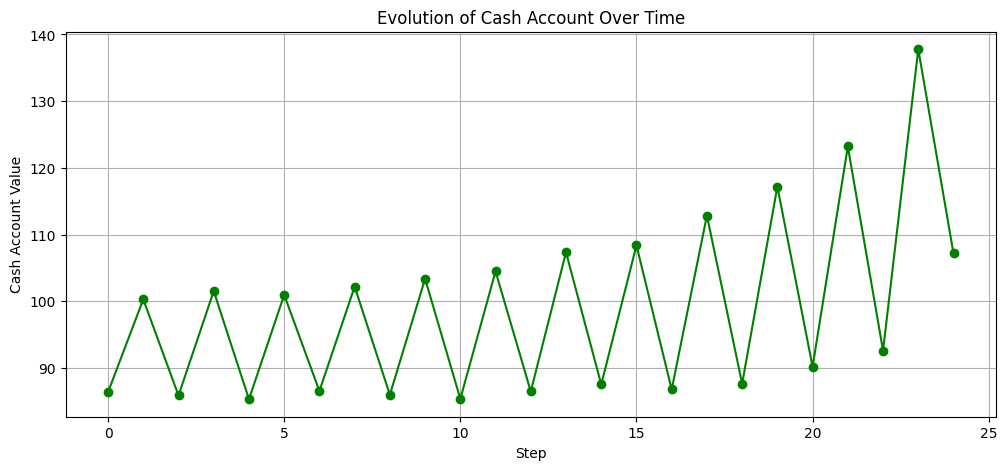

In [64]:
plt.figure(figsize=(12, 5))
plt.plot(range(len(cash_account_evolution)), cash_account_evolution, marker='o', linestyle='-', color='green')

plt.xlabel('Step')
plt.ylabel('Cash Account Value')
plt.title('Evolution of Cash Account Over Time')

plt.grid(True)

# Display the plot
plt.show()

27. Finally, repeat Q26 considering now an Asian ATM Put option. Comment on our results as compared to the regular American Put option case of Q25.

In [65]:
S0 = 180
K = 182
r = 0.02
sigma = 0.25
T = 0.5
n = 25
dt = T / n
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
p = (np.exp(r * dt) - d) / (u - d)

# Initialize stock price tree and average price tree
stock_price_tree = np.zeros((n+1, n+1))
average_tree = np.zeros((n+1, n+1))
option_tree = np.zeros((n+1, n+1))

# Build stock price tree
stock_price_tree[0, 0] = S0
for i in range(1, n+1):
    for j in range(i+1):
        stock_price_tree[j, i] = S0 * (u**(i-j)) * (d**j)

# Calculate average stock prices and option payoffs
for i in range(n+1):
    average_tree[i, n] = np.mean(stock_price_tree[:i+1, n])
    option_tree[i, n] = max(K - average_tree[i, n], 0)

# Backward induction for option prices
for i in range(n-1, -1, -1):
    for j in range(i+1):
        average_tree[j, i] = (average_tree[j, i+1] * (i+1) + stock_price_tree[j, i]) / (i+2)
        option_tree[j, i] = np.exp(-r*dt) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])

print("Asian ATM Put Option Price at t=0: {:.2f}".format(option_tree[0, 0]))

Asian ATM Put Option Price at t=0: 0.00


In [66]:
delta_tree = np.zeros((n, n))

# Calculate the delta at each node
for i in range(n):
    for j in range(i+1):
        delta_tree[i, j] = (option_tree[j, i+1] - option_tree[j+1, i+1]) / (stock_price_tree[j, i] - stock_price_tree[j+1, i])

# Round delta to two decimals
delta_tree = np.round(delta_tree, 2)

print("Delta Tree:")
print(delta_tree)

Delta Tree:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.

In [67]:
path = np.zeros(n+1)
cash_account = np.zeros(n+1)
path[0] = S0
cash_account[0] = -delta_tree[0, 0] * path[0] + option_tree[0, 0]

for i in range(1, n+1):
    path[i] = path[i-1] * u
    delta = delta_tree[i-1, i-1]
    cash_account[i] = cash_account[i-1] * np.exp(r * dt) - delta * (path[i] - path[i-1]) + option_tree[i, i]

print("\nDelta Tree (first few rows):")
print(delta_tree[:5, :5])

print("\nCash Account Evolution:")
for i in range(n+1):
    print(f"Step {i}: Stock Price = {path[i]:.2f}, Cash Account = {cash_account[i]:.2f}")


Delta Tree (first few rows):
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

Cash Account Evolution:
Step 0: Stock Price = 180.00, Cash Account = 0.00
Step 1: Stock Price = 186.48, Cash Account = 0.00
Step 2: Stock Price = 193.19, Cash Account = 0.00
Step 3: Stock Price = 200.14, Cash Account = 0.00
Step 4: Stock Price = 207.34, Cash Account = 0.00
Step 5: Stock Price = 214.81, Cash Account = 0.00
Step 6: Stock Price = 222.54, Cash Account = 0.00
Step 7: Stock Price = 230.54, Cash Account = 0.00
Step 8: Stock Price = 238.84, Cash Account = 0.00
Step 9: Stock Price = 247.44, Cash Account = 0.00
Step 10: Stock Price = 256.34, Cash Account = 0.00
Step 11: Stock Price = 265.57, Cash Account = 0.00
Step 12: Stock Price = 275.12, Cash Account = 0.00
Step 13: Stock Price = 285.02, Cash Account = 0.00
Step 14: Stock Price = 295.28, Cash Account = 0.00
Step 15: Stock Price = 305.91, Cash Account = 0.00
Step 16: Stock Price = 316.92, Cash Account = 0.

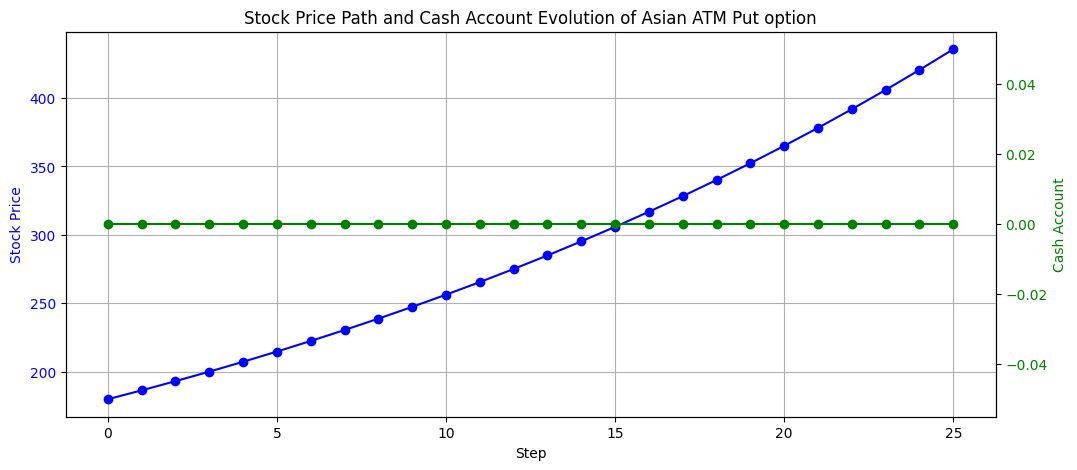

In [68]:
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(range(len(path)), path, marker='o', linestyle='-', color='blue', label='Stock Price Path')
ax1.set_xlabel('Step')
ax1.set_ylabel('Stock Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(range(len(cash_account)), cash_account, marker='o', linestyle='-', color='green', label='Cash Account Evolution')
ax2.set_ylabel('Cash Account', color='green')
ax2.tick_params(axis='y', labelcolor='green')


plt.title('Stock Price Path and Cash Account Evolution of Asian ATM Put option')

ax1.grid(True)

plt.show()

<font size="6"> Conclusion </font>   

This study uses Binominal and Trinomial trees to explain the pricing of European, American, and Asian options. Special focus falls on delta hedging as an important factor for risk management in the course of pricing options. In its course of pricing options, this study will use the put-call parity principle to ensure that the calculations have a sound basis. European options fit well with theoretical models, while American options require more complex considerations due to the early exercise feature. On the other hand, the averaging calculation method of the feature makes delta variations smoother and less sensitive to short-term volatility in the case of Asian options. The research contributes to a global picture in pricing and hedging options that help manage the risk within markets varying in their nature.

End of Analysis